# Towards Visually Explaining Variational Autoencoders
To run this notebook, activate the conda environment via the environment.yml file and start jupyter notebook within this environmnent. 

Pretrained networks for the different models are available at:

https://drive.google.com/drive/folders/1OrX5HuH6vjSD8D2gLLv7ANc1iBUuVGHY?usp=sharing

In [11]:
cd Anomaly_Detection

/home/leonardo/Downloads/FACT/FACT-AI/Anomaly_Detection


In [10]:
cd ..


/home/leonardo/Downloads/FACT/FACT-AI


In [2]:
import random

## MNIST Anomaly Detection

In [31]:
run -t code/test_expVAE.py --dataset=mnist --model=vanilla_mnist --batch_size=32 --model_path='./ckpt/vanilla_best.pth'  --target_layer='encoder.2'

using device cuda
Layer is: encoder.2

IPython CPU timings (estimated):
  User   :      13.01 s.
  System :       0.36 s.
Wall time:       2.26 s.


mnist data

IPython CPU timings (estimated):
  User   :       0.07 s.
  System :       0.00 s.
Wall time:       0.07 s.


/home/leonardo/Downloads/FACT/FACT-AI/Anomaly_Detection/code/show_results.py:29: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show(block=True)


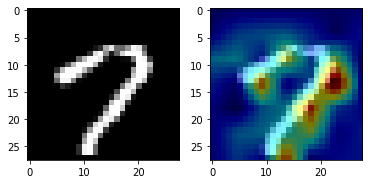

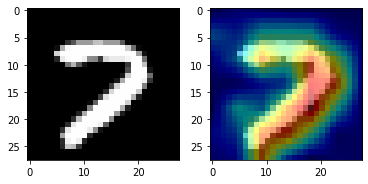

In [38]:
run -t code/show_results.py --dataset=mnist --model=vanilla_mnist 

In [4]:
img = random.choice([x for x in os.listdir("test_results/vanilla")
               if os.path.isfile(os.path.join("test_results/vanilla", x))], )
print(img)

17-21-origin.png


## USCD-Ped1 Anomaly Detection

In [23]:
run code/test_expVAE.py --dataset='ucsd_ped1' --model=vanilla_ped1 --batch_size=32 --model_path='./ckpt/vanilla_ped1_best.pth' --target='encoder.2'

using device cuda
layer issss encoder.2


FileNotFoundError: [Errno 2] No such file or directory: './ckpt/vanilla_ped1_best.pth'

## MVTec Anomaly Detection

### To train the models:

**Info:**  training one model can take up to 1 hour on a gpu. Downloading the dataset takes up 5 Gb.

Specify the target as the index according to the following list(e.g. bottle: 0, cable: 1): 

['bottle', 'cable', 'capsule', 'carpet', 'grid',
               'hazelnut', 'leather', 'metal_nut', 'pill', 'screw',
               'tile', 'toothbrush', 'transistor', 'wood', 'zipper']

In [44]:
object_class = 5 # 5 is nut
pre_trained_model= './ckpt/resnet18_3_mvtecClass_'+str(object_class) +'_final.pth'
self_trained_model = './ckpt/resnet18_3_mvtecClass_'+str(object_class) +'_checkpoint.pth'
target_layer = 'encoder.layer2.1.conv1'

In [9]:
run -t  code/train_expVAE.py --dataset=mvtec_ad --model=resnet18_3 --batch_size=8 --one_class=$object_class

Device is cuda
For class hazelnut
Epoch [1/512] loss: 131240.692 
Lr: 0.0001


KeyboardInterrupt: 


IPython CPU timings (estimated):
  User   :      32.49 s.
  System :       0.43 s.
Wall time:      33.28 s.


### To test the self-trained model:

**Info:** to find the best IoU score set the flag: --iou True

In [6]:
run code/test_expVAE.py --dataset=mvtec_ad --model=resnet18_3 --batch_size=2 --model_path=$self_trained_model --one_class=$object_class --target_layer=$target_layer

using device cuda
For class hazelnut
Layer is: encoder.layer2.1.conv1


RuntimeError: [enforce fail at inline_container.cc:222] . file not found: archive/data/93830729901536

### To load pretrained models:

In [26]:
run -t code/test_expVAE.py --dataset=mvtec_ad --model=resnet18_3 --batch_size=2 --model_path=$pre_trained_model --one_class=$object_class --target_layer=$target_layer

using device cuda
For class hazelnut
Layer is: encoder.layer2.1.conv1
AUROC score: 0.9299496451959681

IPython CPU timings (estimated):
  User   :      41.81 s.
  System :       0.71 s.
Wall time:      32.31 s.


mvtec_ad data

IPython CPU timings (estimated):
  User   :       0.07 s.
  System :       0.00 s.
Wall time:       0.08 s.


/home/leonardo/Downloads/FACT/FACT-AI/Anomaly_Detection/code/show_results.py:28: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show(block=True)


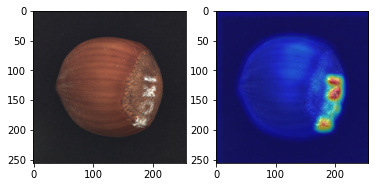

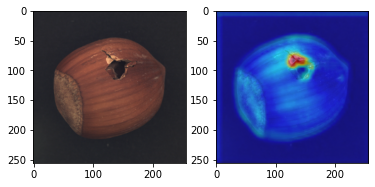

In [48]:
run -t code/show_results.py --dataset=mvtec_ad --model=resnet18_3 --one_class=$object_class

## dSprites Latent Space Disentanglement
Make sure you are in the Latent_Space_Disentanglement directory

In [ ]:
# cd Anomaly_Detection

In [3]:
cd ../Latent_Space_Disentanglement/

/home/leonardo/Downloads/FACT/FACT-AI/Latent_Space_Disentanglement


If you have not yet downloaded the dSprites dataset, uncomment the following cell and run it.

In [5]:
# !sh scripts/prepare_data.sh dsprites

fatal: destination path 'dsprites-dataset' already exists and is not an empty directory.


### Visualizing attention maps
First we reproduce the attention maps of the two highest response latent dimensions for the baseline FactorVAE and the best performing AD-FactorVAE using $\lambda=40$ and the first convolutional layer. Press any key to close the image. (Using the --help flag you can find more options)

In [6]:
!python visualizer.py --name FactorVAE --target_layer 0 --cuda --sample_count 10

loaded checkpoint 'checkpoints/FactorVAE'


In [7]:
!python visualizer.py --name AD-FactorVAE --target_layer 0 --cuda --sample_count 10

loaded checkpoint 'checkpoints/AD-FactorVAE'


### Plotting the results
Next we plot the results for all the models used, corresponding to 3a in the report. Using the --help flag you can find more options, for example --all_plots will show more information about the loss progression.

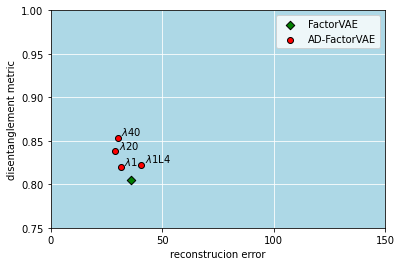

In [8]:
%run plotter.py --names 'gamma40 lambda1_gamma40 lambda20_gamma40 lambda40_gamma40 conv3_lambda1_gamma40'